# Introduction to Machine Learning 

## DataRes

### Overview of this Workshop 
1. Tutorial 
2. Activity 
3. Q/A 

## What is Machine Learning?

![Source: Cousins of AI Article](https://miro.medium.com/max/1262/1*TiORvHgrJPme_lEiX3olVA.png)

**Definition** : 

Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention

**Common Uses of ML:**

1. ML as a predictive tool that can model future outcomes based upon prior data

2. ML as a interpretable tool that can help us understand real-world processes better

**Applications of ML in the real world:**
1. Image Recognition

2. Speech Recognition

3. Content/Product recommendations

4. Stock Market trading

5. Medical Diagnosis

There are many more fields in which ML is used and this is continually growing in this digital age

**Types of Machine Learning Problems** : 
1. Supervised Learning

* Using labelled data 
* We give the model of example input and output groups in training set, and it tries to learn ways of predicting the output using solely the input features 
* e.g. Regression or Classification  

2. Unsupervised Learning

* Using unlabeled data
* Often involves grouping observations together or detecting patterns within the dataset 
* e.g. Clustering or Association 
* Pretty much all content or product recommendation engines use some form of Unsupervised Learning

3. Reinforcement Learning
* You have 'agents' that take actions in their given 'environment' and they get punished or rewarded by those actions
* Over time these 'agents' learn to take actions that maximize their reward
* e.g. an Agent that trades Stocks, AlphaGo (developed by Deep Mind to beat the world number 1 ranked Go board game player)


In this tutorial, we will primarily be focusing on a Supervised Learning problem. 

#### The Dilemma of Overfitting vs. Underfitting when building a Machine Learning Model
![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

**Underfitting (High Bias)**

- Underfitting is when your model cannot capture the underlying trend of the data.
- Underfitting destroys the accuracy of our machine learning model.

Techniques to reduce underfitting :
1. Increase model complexity
2. Increase number of features, performing feature engineering
3. Remove noise from the data.
4. Increase the number of epochs or increase the duration of training to get better results. (i.e. show the model more data)



**Overfitting (High Variance)**

- Overfitting is when your model produces predictions that follow the training data so closely that it fails to generalize well to un-seen data. 

- This means that it will likely to predict the training dataset with a high level of accuracy, but perform poorly when forecasting future events

Techniques to reduce overfitting :
1. Increasing diversity of training data
2. Reduce model complexity.
3. Early stopping during the training phase
4. Regularization and dropout for neural networks

## What is Sci-Kit Learn?

![](https://scikit-learn.org/stable/_static/ml_map.png)

Source: Sci-kit Learn Documentation

Sci-Kit Learn (also known as Sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms and is one of the easiest packages to start learning machine learning with. 

It is built to easily be intergrated with pandas, numpy, scipy and matplotlib, meaning that you should have decent knowledge of these libraries before using Sklearn. 

In this workshop we will be introducing the Sklearn library, and going through how we can use it easily tackle machine learning problems.  







### Tutorial Problem 1: Classification

In [ ]:
# importing the neccessary libraries 
import numpy as np
import pandas as pd
import sklearn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read in the data
titanic = pd.read_csv('https://raw.githubusercontent.com/shailm99/intro2ML/main/titanic.csv', 
                      index_col = 'PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Columns in the Dataset
* Survival (This is what we will be predicting!)
* pclass (Ticket class)
* Sex
* Age
* sibsp (# of siblings / spouses aboard the Titanic)
* parch (# of parents / children aboard the Titanic)
* ticket (Ticket number)
* fare (Passenger fare)
* cabin (Cabin number)
* embarked (Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton)

### Step 1: Model Data Preprocessing
##### 1. Feature Selection/Engineering




In [ ]:
# 1. Feature Selection/Engineering
# You should usually do some feature engineering, and EDA to understand the data, correlations and any distributions

# For the purpose of time we will not be performing feature engineering

features = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X  = titanic[features]
y = titanic['Survived']

##### 2. Creating a **Train/Validation/Test** Split:

##### What is the difference between these three datasets:
 - Training Data:
 
 This is the set of data you use to 'fit' your models to. 
 
 
 - Validation Data: 
 
 This is the set of data you use to compare different model's performances on unseen data. 
 
 Not required but can be useful when comparing different models
 
 
 - Testing Data:
 
 This is a set of data that you do not use for any training or validation, but instead it acts as a unseen set of data that is used to evaluate your model's generalizability. This will provide an unbiased evaluation of a final model. 

In [ ]:
# 2. Splitting Data Into a Train-Test Split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1, stratify = y, test_size = 0.25) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
807,1,male,39.0,0,0,0.0000,S
748,2,female,30.0,0,0,13.0000,S
293,2,male,36.0,0,0,12.8750,C
782,1,female,17.0,1,0,57.0000,S
283,3,male,16.0,0,0,9.5000,S
...,...,...,...,...,...,...,...
651,3,male,NaN,0,0,7.8958,S
473,2,female,33.0,1,2,27.7500,S
266,2,male,36.0,0,0,10.5000,S


In [ ]:
test_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
392,3,male,21.0,0,0,7.7958,S
585,3,male,NaN,0,0,8.7125,C
611,3,female,39.0,1,5,31.2750,S
262,3,male,3.0,4,2,31.3875,S
497,1,female,54.0,1,0,78.2667,C
...,...,...,...,...,...,...,...
435,1,male,50.0,1,0,55.9000,S
332,1,male,45.5,0,0,28.5000,S
560,3,female,36.0,1,0,17.4000,S


##### 3. Handling Missing Values

Option 1: Impute it 

Using the mean, median, or other more complex techniques you can try to impute/fill in these missing values. 
This is much easier if the feature you are imputing is continous/numeric and each individual observation is independent


Option 2: Drop the rows 

This is useful if you only have a couple of rows that have missing values for a given column

Option 3: Drop the entire column

This is useful if a large portion of the column has missing values

In [ ]:
# check if there is any missing values 

print(train_X.isnull().sum())

print(test_X.isnull().sum())



Pclass        0
Sex           0
Age         133
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         44
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [ ]:
# Option 1: Impute the Age
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
train_X['Age'] = imputer.fit_transform(np.array(train_X['Age']).reshape(-1, 1))
test_X['Age'] = imputer.transform(np.array(test_X['Age']).reshape(-1, 1))


In [ ]:
# Option 2: Drop the columns where Embarked is Missing

train_X.dropna(subset = ['Embarked'], axis = 0, inplace = True)

# One thing we need to remember is to reindex our training Y values since we dropped some rows
train_y = train_y[train_X.index]


In [ ]:
print(train_X.isnull().sum())

print(test_X.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


##### 4. Handling Categorical Data 

There are many ways to handle categorical data, but two of the most simple ways to do so is with:

* Label Encoding

This involves assigning a number to each category and transforming the categories to their respective numerical value. 

This is only useful when there is a natural ordering with the categories (i.e. the categorical variable is nominal)

e.g. Low = 1  Medium = 2 High = 3

* One Hot Encoding

One Hot Encoding involves transforming a single categorical column of 'k' categories into 'k' columns, which all represent a category and are indicated by 1s and 0s, where 1 indicates that the observation is in that category

This is useful when there is no-natural ordering with the categories, and when there are very little distinct categories as if we had a lot of categories then using One Hot Encoding would involve creating a lot of new columns


In [ ]:
# Pclass is actually a categorical variable but it is already label encoded for us (since there is a natural ordering)
# We will use the get_dummies function in pandas to convert the rest of the categorical variables into OneHotEncoded  
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
807,1,39.0,0,0,0.000,0,1,0,0,1
748,2,30.0,0,0,13.000,1,0,0,0,1
293,2,36.0,0,0,12.875,0,1,1,0,0
782,1,17.0,1,0,57.000,1,0,0,0,1
283,3,16.0,0,0,9.500,0,1,0,0,1


##### 5. Feature Scaling (if necessary)

In practice, we often encounter different types of variables in the same dataset. A significant issue is that the range of the variables may differ a lot. Using the original scale may put more weights on the variables with a large range. In order to deal with this problem, we need to apply the technique of features rescaling to independent variables or features of data in the step of data pre-processing. 

Methods of Feature Scaling:

1. Normalization 

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.


2. Standardization 

Standardization is another scaling technique where the values are converted into a normal distribution (usually the standard normal distribution) with mean 0 and standard deviation 1. The formula for the z-score is used to perform this type of scaling

**When to use which technique:**

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range so it is more robust to outliers in comparison to Normalization.


In [ ]:
# Let's use normalization for Age and Fare
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # intialize an instance of the MinMaxScaler class
train_X[['Age', 'Fare']] = scaler.fit_transform(train_X[['Age', 'Fare']])

# note how we only transform the dataset and not fit_transform
test_X[['Age', 'Fare']] = scaler.transform(test_X[['Age', 'Fare']]) 

train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
807,1,0.524327,0,0,0.000000,0,1,0,0,1
748,2,0.402011,0,0,0.025374,1,0,0,0,1
293,2,0.483555,0,0,0.025130,0,1,1,0,0
782,1,0.225333,1,0,0.111257,1,0,0,0,1
283,3,0.211742,0,0,0.018543,0,1,0,0,1


In [ ]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
392,3,0.279696,0,0,0.015216,0,1,0,0,1
585,3,0.388421,0,0,0.017006,0,1,1,0,0
611,3,0.524327,1,5,0.061045,1,0,0,0,1
262,3,0.035064,4,2,0.061264,0,1,0,0,1
497,1,0.728187,1,0,0.152766,1,0,1,0,0


#### Step 2: Fit the Model

There are several different models that can be used for binary classification problems like these. 
Here are some of the most popular options:

 - **Logistic Regression**
 
 This is a type of generalized linear model that predicts a binary outcome (1 or 0). Logistic regression fits a sigmoid function to the data, and returns the probablity of an outcome. We can use this probablity in classification problems to make predictions, e.g. if the probablity is greater than 0.5, then we predict that the outcome will occur (1), otherwise we can say that the outcome will not occur (0)

  * *StatQuest:* https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer
  * *Scikit-learn Documentation:* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 

 - **Decision Tree**
 
 ![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Decision_Tree.jpg/220px-Decision_Tree.jpg)
 
 A Decision Tree uses the features in the dataset to 'ask' a question about an observation and splits to a different outcome depending on the answer to this question. You continue to work your way down a decision tree until you get to a point where you can't go any further, and then you just classify the outcome based on where you end up.

  * *StatQuest:* https://www.youtube.com/watch?v=7VeUPuFGJHk&ab_channel=StatQuestwithJoshStarmer
  * *Scikit-learn Documentation:* 
    - Classification: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    - Regression: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor



 

 - **Random Forest**
 
 Random Forests is an ensemble ML technique (i.e. it uses multiple learners), in which we bulid several decision trees using a bootstrapped datasets and randomly selecting a subset of variables in each step. This results in a variety of trees, which all 'vote' as to the overall outcome predicted by the model. 

  * *StatQuest:* https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer
  * *Scikit-learn Documentation:* 
    - Classification: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    - Regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

 

 - **XGBoost**
 
 XGBoost stands for extreme gradient boosting, which is an implementation of gradient boosting with several additional features focused on performance and speed. 

 Gradient Boosting is a method that goes through cycles to iteratively add models into an ensemble. Essentially we will be buliding an original decision tree and then fitting a subsequent tree on the residuals (also know as the error). This process is represented to construct many trees that address the weaknesses in the model.
  * *StatQuest:* https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer 
  * *XGBoost Documentation:* https://xgboost.readthedocs.io/en/stable/python/python_intro.html
  

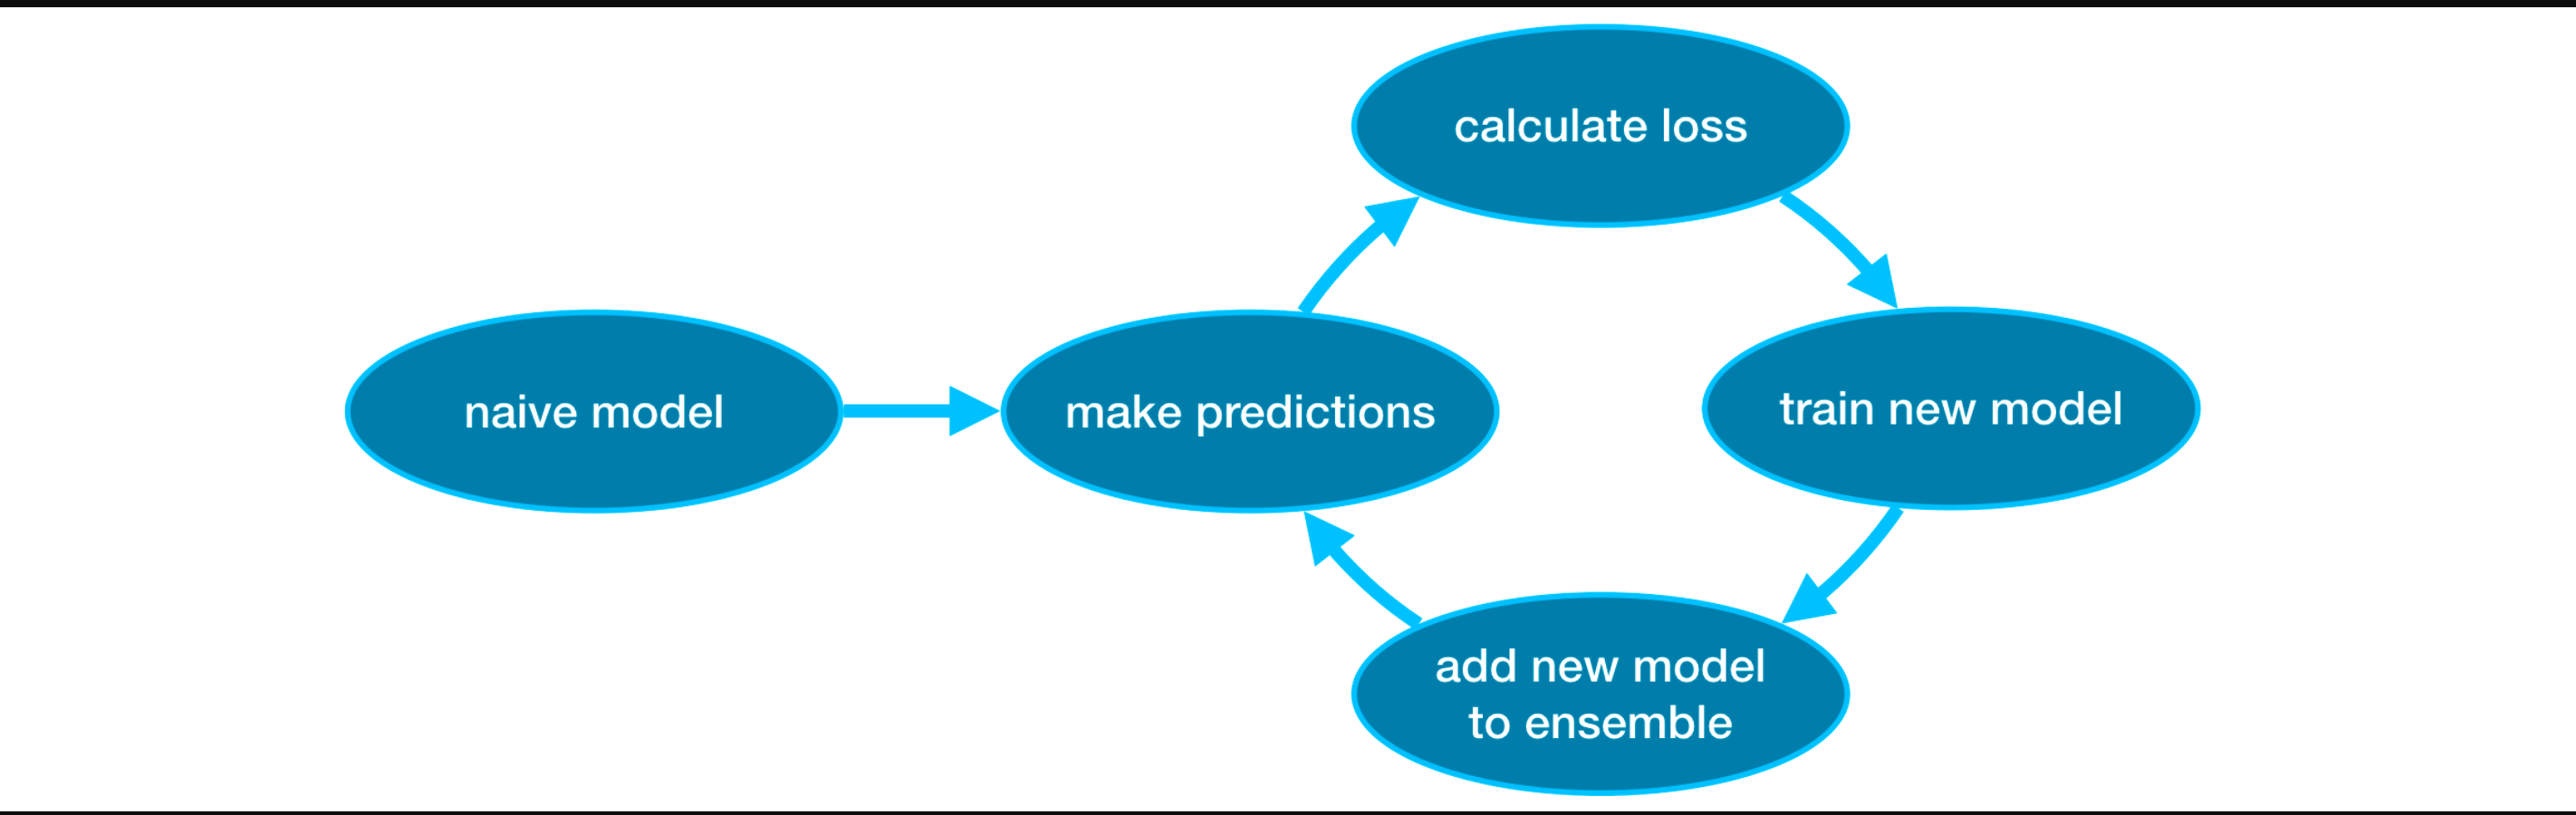

In [ ]:
from IPython.display import Image
Image(filename='Screenshot 2021-05-10 at 9.48.42 PM.png')

There are more models, and a lot more theory behind the models discussed above, but this is a basic introduction into the field of machine learning so I didn't want to go too heavy into the theory. If you're interested in reading or learning more, I've attached several links at the end of the notebook that you can check out

##### Comparing Models using K-Fold Cross Validation:

**What is it?**

K-Fold Cross Validation involves splitting your data up into 'k' randomly shuffled sets, and using 'k-1' of these sets as your training set and the remaining 1 set as your testing set. This process is repeated until every set is used as a testing set. For each set, a metric (e.g. accuracy) is calculated, and usually the performance of the model is determined by the mean of this metric across the different sets. 
![](https://www.researchgate.net/profile/Amine-Chemchem/publication/335074407/figure/fig1/AS:797152414552066@1567067354913/k-fold-cross-validation-example.png)

This is an example of cross-validation, where k = 5.

**Why is it used?**

- When your original dataset is very small, so you cannot set aside enough data for validation without comprising the size of your training set
- To compare your models performance and generalizability across different sets of data. It generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split. 


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cv = cross_val_score(lr, train_X, train_y) # performs 5-fold cross validation
print(np.mean(cv))

0.7988329031534057


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, train_X, train_y)
print(np.mean(cv))

0.7807653462013241


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y)
print(np.mean(cv))

0.8003029962967119


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y)
print(np.mean(cv))

0.809314330602626


#### Step 3: Make Predictions

After deciding which models you want to focus on based upon your cross-validation score, we can then use these models to make predictions. We will focus on the Random Forest and XGBoost models for the rest of this problem. 

The first step before making predictions is to fit the model on the entire training dataset. After we have done this, then we can call the predict method to easily make predictions about the testing data. 

Note: when calling the predict method we only have to provide the X-features, whereas in the fit method we need to provide both the X and y features

In [ ]:
rf.fit(train_X, train_y)
rf.predict(test_X)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1])

Using our model we can make predictions about any hypothetical example. Let's run through one right now. 

In [ ]:
# suppose we want to predict a hypothetical example
# Let's say I want to predict whether the following person would survive:
# Age: 22
# PClass: 2
# SibSp: 1
# Parch: 2
# Fare: 30
# Sex: Male
# Embarked: Queenstown

# create a dataframe with a row(s) representing your hypothetical person(s)
me = pd.DataFrame(pd.Series([1, 22, 1, 2, 30, 0, 1, 0, 1, 0], index  = train_X.columns)).T
me

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,22,1,2,30,0,1,0,1,0


In [ ]:
# Step 1: preprocess age and fare - remember we need to normalize the values using the scaler we fit on the training set

me[['Age', 'Fare']] = scaler.transform(me[['Age', 'Fare']])

print(rf.predict(me)) # predicts that I would survive

print(rf.predict_proba(me)) # 60% of not surviving and 40% of surviving

[0]
[[0.6 0.4]]


#### Step 4: Evaluate the Model

To evaluate your model's overall performance we have to use it predict the response variable using the features in the testing set only (Test_X), and compare these predictions to the actual values (Test Y).

We have to consider different model metrics to measure our model's performance. Here are some useful ones often considered:

**Classification Problems:**
- Accuracy:

The percentage of correctly classified observation $$\frac{Total \ Correct \ Predictions}{Total \ Number \ of \ Predictions}$$ 

- Precision Score:

This measures the proportion of observations that were predicted true and correct. $$\frac{True \ Positives}{Predicted \ Positives}$$

This tells us that given our model predicts a person survives what is the chance that they actually do survive. 


- Recall/Sensitivity Score:

This measures the proportion of positives that are correctly identified. $$\frac{True \ Positives}{Actual \ Positives}$$

This tells us given that we have a person who survives, what is the chance that we correctly predict their survival?

**Regression Problems:**
- Mean Absolute Error:

This measures the average absolute deviation between the predictions and true response values

- Mean Squared Error:

This measures the average squared deviation between the predictions and true response values


- $R^2$:

This a statistical measure that represents the proportion of the total variance for a dependent variable that's explained by an independent variable or variables in a model.

Note: That we would try to minimize MAE and MSE, but try to maximize the adjusted $R^2$ value for a model 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
predictions = rf.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Accuracy Score: 0.8251121076233184
Precision Score: 0.8051948051948052
Recall Score: 0.7209302325581395


array([[122,  15],
       [ 24,  62]])

In [ ]:
xgb = XGBClassifier(random_state = 1)
xgb.fit(train_X, train_y)
predictions = xgb.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Accuracy Score: 0.8161434977578476
Precision Score: 0.7777777777777778
Recall Score: 0.7325581395348837


array([[119,  18],
       [ 23,  63]])

## Templated Structure for using Models in Sklearn

You will notice once you start using sci-kit learn that there is essentially the same structure of code that you need when fitting any model. 

```
step 1: import your model (refer to sci-kit learn documentation)
step 2: Fit your model to your training data; model.fit(train_X, train_y)
step 3: Make predictions using your fitted model on the testing X; model.predict(test_X)
step 4: Compare your testing predictions with the actual values to see how well your model has generalized to unseen data. This can be done using any metric of your choice which you can import from sklearn.metrics; 
e.g. accuracy_score(test_y, predictions)

```

#### Step 5: Basic Model Interpretability

Machine Learning Model's do not only serve the purpose of being a predictive tool, but they can also be used to generate more insight about the relation between a set of predictor variables and a response outcome. 

#### 1. Feature Importance:

With any model you can see the importance that each feature in your model has on predicting the final response outcome. 

Something interesting to note is that these feature importances do vary between models, and therefore if you have multiple models then it can useful to explore the feature importance for each one as they might be different

We will see that for our random forest model Age and Fare seemed to be the most important factors, but for the XGBoost Model the Sex, and Ticket Class was a lot more important. This can provide insights into factors you may need to dive further into exploring. 

<AxesSubplot:>

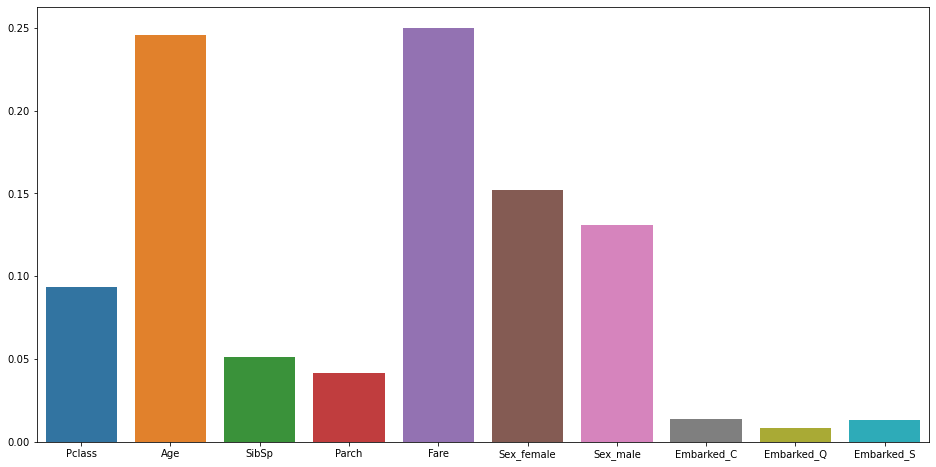

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,8))
sns.barplot(train_X.columns, rf.feature_importances_)

<AxesSubplot:>

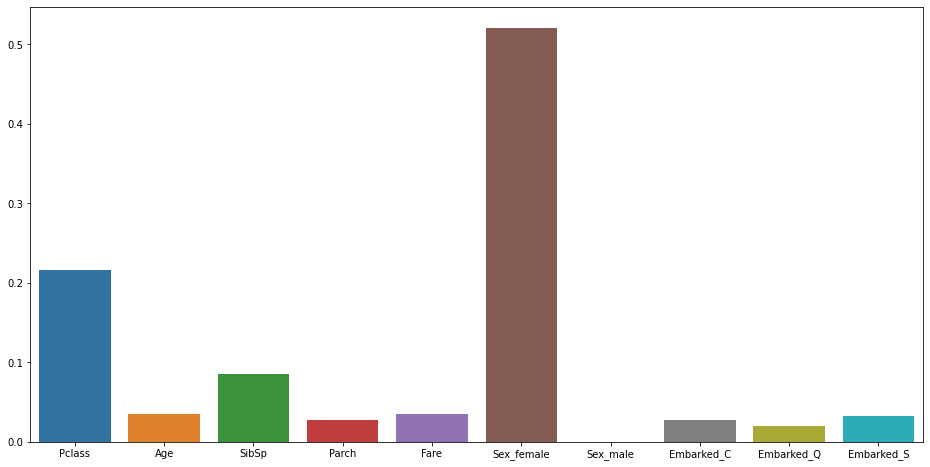

In [ ]:
plt.figure(figsize = (16,8))
sns.barplot(train_X.columns, xgb.feature_importances_)

#### 2. Shap Values:

Shap Values break down a prediction to show the impact of each feature. 

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

**Use cases: to explain the reasons behind individual predictions**

Where could you use this?

- A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
- A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(me)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], me)

## Activity Time!

Now it's time for you to try figure out a machine learning problem, in which we are predicting the price of a house!


Download this .ipynb for the activity: https://drive.google.com/file/d/1uMIevg3hC7y7VcJ2w781DrpuL2A_1BrU/view?usp=sharing


### Additional Tips/Tricks 

Besides the basics of fitting models, followed by evaluating and interpreting them, there are many ways we can improve our machine learning models to achieve better predictive results. 

I'm going to cover some of my favourites that have helped me improve my models in the past! 

In Machine Learning, there is so much you can do to actually improve your model so this by no-means is exhaustive or the 'go-to' guide, but just a couple of tricks that have helped me in the past. In addition to this, these tricks won't always work, but experimenting with different things within reason can usually help improve model performance. 

#### Improving Model Performance Through Feature Engineering

One of the most underrated ways to improve your ML model is through feature engineering. By thinking creatively and maximizing the use of features within your dataset, you can easily improve the performance of your models by 1-2%. 

In [ ]:
# Feature 1:  Family members on board based on Parch and SibSp
train_X['family'] = train_X['SibSp'] + train_X['Parch']
test_X['family'] = test_X['SibSp'] + test_X['Parch']

train_X.drop(columns = ['SibSp', 'Parch'], inplace = True)
test_X.drop(columns = ['SibSp', 'Parch'], inplace = True)

train_X.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family
PassengerId,,,,,,,,,
807,1,0.524327,0.000000,0,1,0,0,1,0
748,2,0.402011,0.025374,1,0,0,0,1,0
293,2,0.483555,0.025130,0,1,1,0,0,0
782,1,0.225333,0.111257,1,0,0,0,1,1
283,3,0.211742,0.018543,0,1,0,0,1,0


In [ ]:
# Feature 2: Let's go back our original dataset 
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# one thing interesting is to look at the title of the person (which is in the name)
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Capt          1
Countess      1
Sir           1
Lady          1
Don           1
Mme           1
Ms            1
Name: Title, dtype: int64

In [ ]:
# replace keep the top 4 and make the rest into Rare
titanic.Title[~np.isin(titanic['Title'], ['Mr', 'Miss', 'Mrs', 'Master'])] = "Rare"
titanic.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [ ]:
# now lets extract the train and test columns
train_X['Title'] = titanic['Title'].loc[train_X.index]
test_X['Title'] = titanic['Title'].loc[test_X.index]
train_X.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family,Title
PassengerId,,,,,,,,,,
807,1,0.524327,0.000000,0,1,0,0,1,0,Mr
748,2,0.402011,0.025374,1,0,0,0,1,0,Miss
293,2,0.483555,0.025130,0,1,1,0,0,0,Mr
782,1,0.225333,0.111257,1,0,0,0,1,1,Mrs
283,3,0.211742,0.018543,0,1,0,0,1,0,Mr


In [ ]:
from category_encoders import TargetEncoder
# this is a type of encoder for categorical variables that fills the category by its mean value of the target column
encoder = TargetEncoder() 
train_X['Title'] = encoder.fit_transform(train_X['Title'], train_y)
test_X['Title'] = encoder.transform(test_X['Title'])

In [ ]:
train_X.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family,Title
PassengerId,,,,,,,,,,
807,1,0.524327,0.000000,0,1,0,0,1,0,0.161954
748,2,0.402011,0.025374,1,0,0,0,1,0,0.687023
293,2,0.483555,0.025130,0,1,1,0,0,0,0.161954
782,1,0.225333,0.111257,1,0,0,0,1,1,0.778947
283,3,0.211742,0.018543,0,1,0,0,1,0,0.161954


In [ ]:
test_X.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family,Title
PassengerId,,,,,,,,,,
392,3,0.279696,0.015216,0,1,0,0,1,0,0.161954
585,3,0.388421,0.017006,0,1,1,0,0,0,0.161954
611,3,0.524327,0.061045,1,0,0,0,1,6,0.778947
262,3,0.035064,0.061264,0,1,0,0,1,6,0.593750
497,1,0.728187,0.152766,1,0,1,0,0,1,0.687023


In [ ]:
rf.fit(train_X, train_y)
predictions = rf.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Accuracy Score: 0.8251121076233184
Precision Score: 0.7901234567901234
Recall Score: 0.7441860465116279


array([[120,  17],
       [ 22,  64]])

In [ ]:
xgb = XGBClassifier(random_state = 1)
xgb.fit(train_X, train_y)
predictions = xgb.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Accuracy Score: 0.8340807174887892
Precision Score: 0.810126582278481
Recall Score: 0.7441860465116279


array([[122,  15],
       [ 22,  64]])

Our feature engineering had very little impact on the RandomForest Model with the accuracy staying pretty much the same at **82.5%**. However, for the XGBoost Model, our feature engineering has improved the model by almost 2% from **81.6% to 83.4%**

#### Hyperparameter Tuning/Optimization

**What is a hyperparameter?**

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training. This basically means that hyperparameters are set by us before training the model, and can impact the performance of the model. 

Some examples of hyperparameters include:

- Learning Rate
- Batch Size
- Number of Estimators 
- Many more depending on the model you're working with

To use the Hyperparameter optimization methods of RandomizedSearchCV and GridSearchCV, we need to specify the model we want to optimize as well as the hyperparameters to tune and the range of values to test.  

##### GridSearchCV

GridSearchCV tests **all** possible combinations of the hyperparameters you specify. It allows you to generate the best/optimal model within your searching parameter field  

##### RandomizedSearchCV

RandomizedSearchCV tests **a random sample** of possible combinations of the hyperparameters you specify. It randomly samples hyperparameters from your specified range, and scores all the samples. 

#### When should use each one?

If you have a very **large** dataset and/or a **large** list of hyperparameters and values to search over then GridSearchCV may take too long and too much computational resources to run, and therefore RandomizedSearchCV might be a better option. This is particularly useful in the case of XGBoost and Random Forest Models, which have a lot of tune-able parameters

GridSearchCV should be preferred if it does not take long to fit your model and/or you have the computational resources neccessary because it ensures that you have selected the **optimal** hyperparameters for your model since it tests each combination of the hyperparameters

In [ ]:
# Let's see if we can get even better results with hyperparameter optimization 
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state = 1)

params = dict(n_estimators=range(100, 1000, 50), max_features=['auto', 'sqrt', 'log2'], bootstrap = [True, False], 
             max_depth = [10,40,60,80,100], min_samples_split = [2, 5, 10], min_samples_leaf = [1, 2, 4,6,8,10])

clf = RandomizedSearchCV(rf, params, random_state=1 , scoring = 'accuracy', cv = 5, n_iter = 100, verbose = True)
best_rf = clf.fit(train_X, train_y)
best_rf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.9min finished


{'n_estimators': 950,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 1)

params = dict(n_estimators=range(100, 1000, 50), max_features=['auto', 'sqrt', 'log2'], bootstrap = [True, False], 
             max_depth = [10,40,60,80,100], min_samples_split = [2, 5, 10], min_samples_leaf = [1, 2, 4,6,8,10])

clf = GridSearchCV(rf, params, scoring = 'accuracy', cv = 5, verbose = True)
#search = clf.fit(train_X, train_y)
#search.best_params_

# there are a total 48600 fits to run with GridSearchCV

In [ ]:
print("Best Random Forest Model Predictions")
predictions = best_rf.best_estimator_.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Best Random Forest Model Predictions
Accuracy Score: 0.8340807174887892
Precision Score: 0.8266666666666667
Recall Score: 0.7209302325581395


array([[124,  13],
       [ 24,  62]])

We can see that by hyperparameter tuning we have improved the performance of the Random Forest Model from 82.5% to 83.4%. 

In [ ]:
from scipy import stats
params = param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

clf = RandomizedSearchCV(xgb, params, random_state = 1 , scoring = 'accuracy', cv = 5, n_iter = 200, verbose = True)
best_xgb = clf.fit(train_X, train_y)
best_xgb.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.6min finished


{'colsample_bytree': 0.7173402269204036,
 'learning_rate': 0.024330456728006766,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 220,
 'subsample': 0.791712134418336}

In [ ]:
print("Best XGBoost Model Predictions")
predictions = best_xgb.best_estimator_.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Best XGBoost Model Predictions
Accuracy Score: 0.8385650224215246
Precision Score: 0.8125
Recall Score: 0.7558139534883721


array([[122,  15],
       [ 21,  65]])

We can see that by hyperparameter tuning we have improved the performance of the XGBoost Model from 83.4% to 83.9%.

#### Create a Voting Classifier 

#### What is a Voting Classifier? 

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class). In this set up each model 'votes' on an outcome, and some sort of average is taken among all the votes.

#### Hard vs. Soft Voting

Hard voting means that each model predicts an outcome, and the overall prediction is based upon a majority consenus of the outcomes. 

e.g. If we have 3 models (A, B & C) in our voting classifier, then Model A predicts survival, B predicts non-survival, and C predicts survival, then our model will predict survival because we have a majority for this outcome 

In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class 1 = (0.30, 0.47, 0.53) and 0 = (0.20, 0.32, 0.40). So the average for class 1 is 0.4333 and 0 is 0.3067, the winner is clearly class 1 because it had the highest probability averaged by each classifier.


#### Weights in a Voting Classifier

One hyperparameter you have to set in a voting classifier is the weights of each model. This can be tuned and optimized through the Randomized and Grid Search CV to achieve the best possible voting model. 

In [ ]:
from sklearn.ensemble import VotingClassifier
final_model= VotingClassifier(estimators = [('rf',best_rf.best_estimator_), 
                                            ('xgb',  best_xgb.best_estimator_)], 
                              voting = 'soft', weights = [1,1])
final_model.fit(train_X, train_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=80,
                                                     max_features='sqrt',
                                                     min_samples_leaf=6,
                                                     n_estimators=950,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7173402269204036,
                                            gamma=0, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
         

In [ ]:
print("Voting Classifier Model Predictions")
predictions = final_model.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Voting Classifier Model Predictions
Accuracy Score: 0.8385650224215246
Precision Score: 0.8205128205128205
Recall Score: 0.7441860465116279


array([[123,  14],
       [ 22,  64]])

In [ ]:
params = {'weights' : np.random.rand(10000, 2), 'voting' : ['hard', 'soft']}

clf = RandomizedSearchCV(final_model, params, 
                         random_state = 1 ,
                         scoring = 'accuracy', 
                         cv = 5, n_iter = 50, verbose = True)
best_final = clf.fit(train_X, train_y)
best_final.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.2min finished


{'weights': array([0.77414716, 0.42817903]), 'voting': 'soft'}

In [ ]:
print("Best Voting Classifier Model Predictions")
predictions = best_final.predict(test_X)
print("Accuracy Score: {}".format(accuracy_score(test_y, predictions)))
print("Precision Score: {}".format(precision_score(test_y, predictions)))
print("Recall Score: {}".format(recall_score(test_y, predictions)))
confusion_matrix(test_y, predictions)

Best Voting Classifier Model Predictions
Accuracy Score: 0.8385650224215246
Precision Score: 0.8205128205128205
Recall Score: 0.7441860465116279


array([[123,  14],
       [ 22,  64]])

Here we can see that creating a voting classifier and optimizing its weights did not have any real impact on the overall performance of the model. Therefore, this may not always be useful, but it is something you could try if you have several models to chose from.

#### Great Sources if You Want To Learn More

[ML Basics](https://towardsdatascience.com/machine-learning-basics-part-1-a36d38c7916)

[Voting Classifiers](https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/)

[Target Encoding vs. One Hot Encoding](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)

[Another approach to Titanic Problem](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[Underfitting and Overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

[Feature Scaling](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

[Ensemble Learning Methods](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

[XGBoost](https://www.kaggle.com/alexisbcook/xgboost)


### Other Sources

[Titanic Dataset](https://www.kaggle.com/c/titanic/data?select=train.csv)

## Any Questions?

## Thank You For Listening!